In [1]:
import pvlib
import matplotlib.pyplot as plt

In [2]:
#Via Fratelli Napoli 67: 40.76082753501443, 14.786915199368758
lat=40.76082753501443
long=14.786915199368758
df_pvgis, _, metadata = pvlib.iotools.get_pvgis_hourly(
    lat, 
    long, 
    start=2023, 
    end=2023, 
    optimalangles = True, 
    pvcalculation=True, 
    components = False, 
    loss = 14, 
    peakpower = 1, 
    mountingplace = 'building',#({'free', 'building'}, default: free) – Type of mounting for PV system.
    map_variables=True
)
df_pvgis = df_pvgis.drop(['solar_elevation', 'wind_speed','Int','poa_global','temp_air'], axis=1)

In [3]:
_

{'location': {'latitude': 40.76082753501443,
  'longitude': 14.786915199368758,
  'elevation': 232.0},
 'meteo_data': {'radiation_db': 'PVGIS-SARAH3',
  'meteo_db': 'ERA5',
  'year_min': 2023,
  'year_max': 2023,
  'use_horizon': True,
  'horizon_db': None,
  'horizon_data': 'DEM-calculated'},
 'mounting_system': {'fixed': {'slope': {'value': 34, 'optimal': True},
   'azimuth': {'value': -6, 'optimal': True},
   'type': 'building-integrated'}},
 'pv_module': {'technology': 'c-Si', 'peak_power': 1.0, 'system_loss': 14.0}}

In [4]:
df_pvgis

,P
time,
2023-01-01 00:10:00+00:00,0.0
2023-01-01 01:10:00+00:00,0.0
2023-01-01 02:10:00+00:00,0.0
2023-01-01 03:10:00+00:00,0.0
2023-01-01 04:10:00+00:00,0.0
...,...
2023-12-31 19:10:00+00:00,0.0
2023-12-31 20:10:00+00:00,0.0
2023-12-31 21:10:00+00:00,0.0


In [5]:
#Load Data
import pandas as pd

# Load and clean data
file_path = "load profile.xlsx"
xls = pd.ExcelFile(file_path)
df_raw = xls.parse('Foglio1')

# Fix headers and clean the dataframe
df_raw.columns = df_raw.iloc[0]
df_load = df_raw[1:]
df_load['Date and time'] = pd.to_datetime(df_load['Date and time'], errors='coerce')
df_load = df_load.dropna(subset=['Date and time', 'Active power (kW)', 'month'])
df_load = df_load[~df_load['Date and time'].duplicated(keep=False)]
df_load['Active power (kW)'] = df_load['Active power (kW)'].astype(float)
df_load = df_load[['Date and time', 'Active power (kW)', 'month']]
df_load.reset_index(drop=True, inplace=True)

# Extract data for June 21 and December 21
june_21 = df_load[df_load['Date and time'].dt.strftime('%Y-%m-%d') == '2018-06-21']
dec_21 = df_load[df_load['Date and time'].dt.strftime('%Y-%m-%d') == '2018-12-21']

C:\Users\lgarc\AppData\Local\Temp\ipykernel_42152\125973475.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_load['Date and time'] = pd.to_datetime(df_load['Date and time'], errors='coerce')


In [6]:
df_load

,Date and time,Active power (kW),month
0,2018-01-01 00:00:00.000,0.213,1
1,2018-01-01 01:00:00.000,0.263,1
2,2018-01-01 02:00:00.000,0.273,1
3,2018-01-01 03:00:00.000,0.287,1
4,2018-01-01 04:00:00.000,0.303,1
...,...,...,...
8755,2018-12-31 18:59:59.998,0.553,12
8756,2018-12-31 19:59:59.998,0.965,12
8757,2018-12-31 20:59:59.998,0.586,12
8758,2018-12-31 21:59:59.998,0.644,12


In [7]:
import pandas as pd

# ----- 1. Create a Complete Hourly Index for 2018 -----
# This index covers every hour in 2018 (non-leap year), with timezone UTC.
full_index = pd.date_range("2018-01-01 00:00:00+00:00", "2018-12-31 23:00:00+00:00", freq="H")

# ----- 2. Prepare the df_load DataFrame -----
# Drop the original "Date and time" column (if not needed) and keep the desired columns.
df_load_new = df_load[['Active power (kW)', 'month']].copy()
# Force the new complete hourly index.
df_load_new.index = full_index

# ----- 3. Prepare the df_pvgis DataFrame -----
# If necessary, you can drop any unwanted columns.
df_pvgis_new = df_pvgis.copy()
# Force the new complete hourly index.
df_pvgis_new.index = full_index

# ----- 4. Merge the Two DataFrames -----
# Since both DataFrames now share the same index, we can merge them via concatenation along columns.
merged_df = pd.concat([df_load_new, df_pvgis_new], axis=1)
merged_df.index.name = "timestamp_hour"

C:\Users\lgarc\AppData\Local\Temp\ipykernel_42152\2750105.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range("2018-01-01 00:00:00+00:00", "2018-12-31 23:00:00+00:00", freq="H")


In [8]:
merged_df

,Active power (kW),month,P
timestamp_hour,,,
2018-01-01 00:00:00+00:00,0.213,1,0.0
2018-01-01 01:00:00+00:00,0.263,1,0.0
2018-01-01 02:00:00+00:00,0.273,1,0.0
2018-01-01 03:00:00+00:00,0.287,1,0.0
2018-01-01 04:00:00+00:00,0.303,1,0.0
...,...,...,...
2018-12-31 19:00:00+00:00,0.553,12,0.0
2018-12-31 20:00:00+00:00,0.965,12,0.0
2018-12-31 21:00:00+00:00,0.586,12,0.0


Annual Load Consumption (kWh): 6699.9439999999995

Calculated Final Yield (Yf) for 1 kW system (kWh/kW): 1300.74478
Required PV Rated Power (Pn) [kW]: 5.2

Yearly Self-Sufficiency (SS): 0.42078785016710585
Yearly Self-Consumption (SC): 0.41681076685217916

21st June Self-Sufficiency (SS): 0.7218095593726662
21st June Self-Consumption (SC): 0.27365776802699027
21st December Self-Sufficiency (SS): 0.3785387874750167
21st December Self-Consumption (SC): 0.7849459703617809

Assignment Summary:
                       Parameter       Value
               Annual Load (kWh) 6699.944000
             Rated PV Power (kW)    5.200000
 Calculated Final Yield (kWh/kW) 1300.744780
Total PV Production (PVGIS, kWh) 6763.872856
    On-Site PV Consumption (kWh) 2819.255032
         Yearly Self-Sufficiency    0.420788
         Yearly Self-Consumption    0.416811
                    21st June SS    0.721810
                    21st June SC    0.273658
                21st December SS    0.378539
          

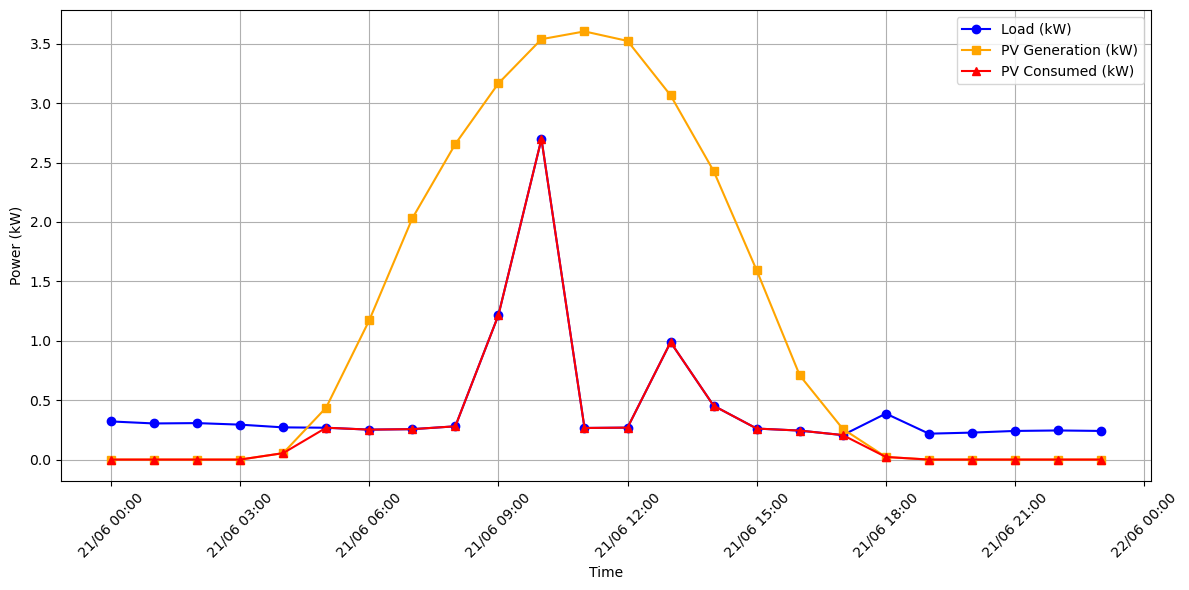


Data for 21 June 2018 (first 24 entries):
                           Active power (kW) month       P  Pac_PVGIS  E_prod_cons  Injection  Absorption
timestamp_hour                                                                                           
2018-06-21 00:00:00+00:00              0.321     6    0.00   0.000000     0.000000   0.000000    0.321000
2018-06-21 01:00:00+00:00              0.304     6    0.00   0.000000     0.000000   0.000000    0.304000
2018-06-21 02:00:00+00:00              0.307     6    0.00   0.000000     0.000000   0.000000    0.307000
2018-06-21 03:00:00+00:00              0.294     6    0.00   0.000000     0.000000   0.000000    0.294000
2018-06-21 04:00:00+00:00              0.271     6   10.39   0.054028     0.054028   0.000000    0.216972
2018-06-21 05:00:00+00:00              0.268     6   84.21   0.437892     0.268000   0.169892    0.000000
2018-06-21 06:00:00+00:00              0.252     6  225.33   1.171716     0.252000   0.919716    0.000000
201

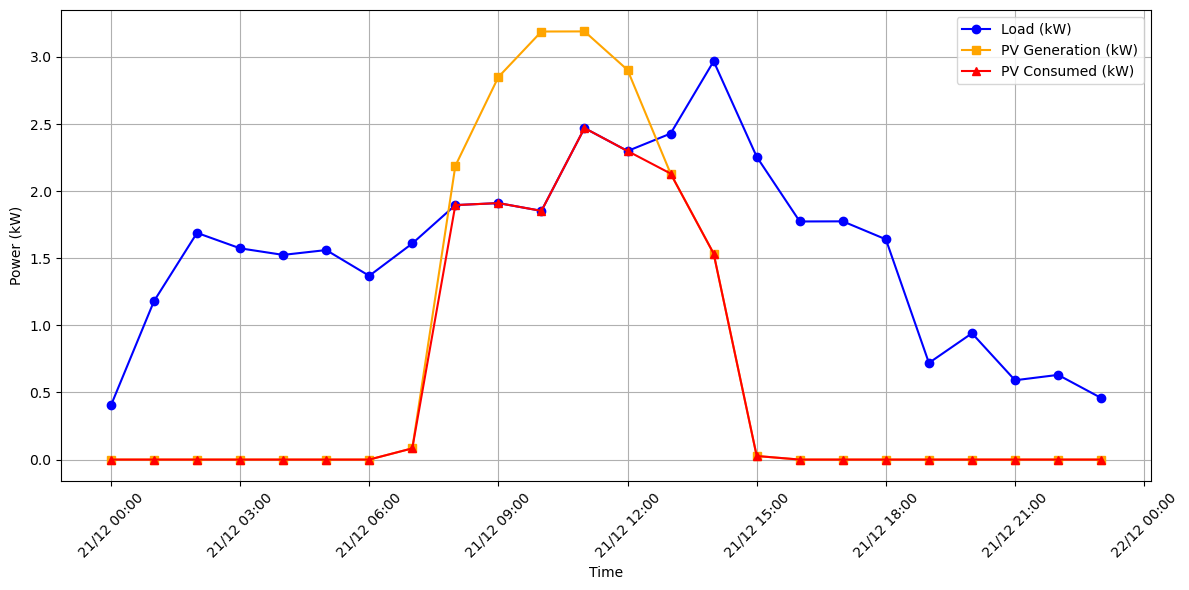


Data for 21 December 2018 (first 24 entries):
                           Active power (kW) month       P  Pac_PVGIS  E_prod_cons  Injection  Absorption
timestamp_hour                                                                                           
2018-12-21 00:00:00+00:00              0.403    12    0.00   0.000000     0.000000   0.000000    0.403000
2018-12-21 01:00:00+00:00              1.180    12    0.00   0.000000     0.000000   0.000000    1.180000
2018-12-21 02:00:00+00:00              1.689    12    0.00   0.000000     0.000000   0.000000    1.689000
2018-12-21 03:00:00+00:00              1.574    12    0.00   0.000000     0.000000   0.000000    1.574000
2018-12-21 04:00:00+00:00              1.525    12    0.00   0.000000     0.000000   0.000000    1.525000
2018-12-21 05:00:00+00:00              1.561    12    0.00   0.000000     0.000000   0.000000    1.561000
2018-12-21 06:00:00+00:00              1.369    12    0.00   0.000000     0.000000   0.000000    1.369000

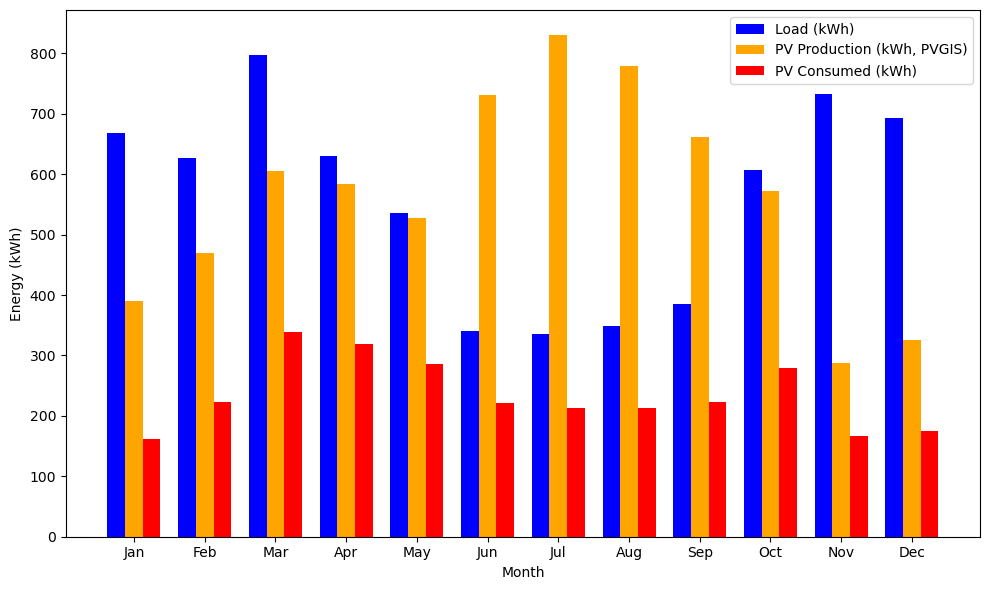


Monthly Summary Data:
 Month  Monthly Load (kWh)  Monthly PV Production (kWh, PVGIS)  Monthly PV Consumed (kWh)  monthly_PV_1kWp_PVGIS
     1             668.024                          389.947116                 161.786044               74.98983
     2             627.342                          469.205724                 223.657588               90.23187
     3             797.112                          606.070296                 339.464224              116.55198
     4             630.447                          583.344788                 318.872972              112.18169
     5             535.588                          528.198892                 285.783364              101.57671
     6             340.280                          731.014180                 221.515244              140.57965
     7             335.313                          830.348480                 212.435828              159.68240
     8             348.641                          778.944660           

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar
import math

# =============================================================================
# ASSUMPTION:
# merged_df is already defined and cleaned with a timezone-aware datetime index
# (named timestamp_hour) covering every hour of 2018.
#
# It contains the following columns:
#   "Active power (kW)"   - Hourly load in kW (instantaneous power; summing over hours yields kWh)
#   "month"               - Month number (if not, it will be extracted from the index)
#   "P"                   - PVGIS production profile for a nominal 1 kW system (in Watts)
# =============================================================================

# -------------------------------
# 1. Load Consumption Calculations
# -------------------------------
E_load = merged_df["Active power (kW)"].sum()
print("Annual Load Consumption (kWh):", E_load)

# Monthly load consumption (in kWh)
monthly_load = merged_df.groupby(merged_df.index.month)["Active power (kW)"].sum()

# -------------------------------
# 2. Determine Rated PV Power (Pn) Using Calculated Final Yield
# -------------------------------
# Compute the annual yield for a 1 kW system from the PVGIS data.
# "P" is provided in Watts. Convert each hourly value to kW (divide by 1000) then sum over the year.
Yf_calculated = merged_df["P"].sum() / 1000.0  #If calculated from the yearly data


print("\nCalculated Final Yield (Yf) for 1 kW system (kWh/kW):", Yf_calculated)

# Required PV rated power is:
Pn = E_load / Yf_calculated
# Ceil Pn to one decimal digit (e.g., 5.01 becomes 5.1)
Pn = math.ceil(Pn*10) / 10
print("Required PV Rated Power (Pn) [kW]:", Pn)

# (b) PVGIS Profile Model:
# Convert "P" from Watts to kW and scale by Pn (this gives the production of the designed plant)
merged_df["Pac_PVGIS"] = Pn * (merged_df["P"] / 1000)

# -------------------------------
# 5. Calculate Instantaneous On-Site PV Consumption (in kW)
# -------------------------------
# At each hour, the on-site PV consumption is the minimum between the load and the PV generation.
merged_df["E_prod_cons"] = np.minimum(merged_df["Active power (kW)"], merged_df["Pac_PVGIS"])

# Summing hourly values gives energy in kWh.
total_Eprod_cons = merged_df["E_prod_cons"].sum()  # Total on-site PV consumption (kWh)
total_PV_prod = merged_df["Pac_PVGIS"].sum()         # Total PV production (kWh) using the PVGIS method

# -------------------------------
# 6. Calculate Self-Sufficiency and Self-Consumption
# -------------------------------
SS_year = total_Eprod_cons / E_load             # Yearly self-sufficiency
SC_year = total_Eprod_cons / total_PV_prod       # Yearly self-consumption

print("\nYearly Self-Sufficiency (SS):", SS_year)
print("Yearly Self-Consumption (SC):", SC_year)

# Optionally, calculate grid injection and absorption:
merged_df["Injection"] = np.where(merged_df["Pac_PVGIS"] > merged_df["Active power (kW)"],
                                  merged_df["Pac_PVGIS"] - merged_df["Active power (kW)"],
                                  0)
merged_df["Absorption"] = np.where(merged_df["Active power (kW)"] > merged_df["Pac_PVGIS"],
                                   merged_df["Active power (kW)"] - merged_df["Pac_PVGIS"],
                                   0)

# -------------------------------
# 7. Calculate Daily Metrics for 21 June and 21 December
# -------------------------------
def calculate_daily_metrics(day_str):
    day_data = merged_df[merged_df.index.strftime("%Y-%m-%d") == day_str]
    E_load_day = day_data["Active power (kW)"].sum()
    PV_prod_day = day_data["Pac_PVGIS"].sum()
    Eprod_cons_day = day_data["E_prod_cons"].sum()
    SS_day = Eprod_cons_day / E_load_day if E_load_day > 0 else np.nan
    SC_day = Eprod_cons_day / PV_prod_day if PV_prod_day > 0 else np.nan
    return SS_day, SC_day

SS_jun21, SC_jun21 = calculate_daily_metrics("2018-06-21")
SS_dec21, SC_dec21 = calculate_daily_metrics("2018-12-21")

print("\n21st June Self-Sufficiency (SS):", SS_jun21)
print("21st June Self-Consumption (SC):", SC_jun21)
print("21st December Self-Sufficiency (SS):", SS_dec21)
print("21st December Self-Consumption (SC):", SC_dec21)

# -------------------------------
# 8. Create Monthly Summary Table (Using Meteorological Model Production)
# -------------------------------
# For monthly aggregation, compute:
# - Monthly Load (from the load profile)
# - Monthly PV Production from the meteorological model (Pac_meteo)
# - Monthly PV Consumed (from E_prod_cons)

monthly_PV_PVGIS = merged_df.groupby(merged_df.index.month)["Pac_PVGIS"].sum()
monthly_PV_consumed = merged_df.groupby(merged_df.index.month)["E_prod_cons"].sum()
monthly_PV_1kWp_PVGIS = merged_df.groupby(merged_df.index.month)["P"].sum()

monthly_summary = pd.DataFrame({
    "Month": monthly_load.index,
    "Monthly Load (kWh)": monthly_load.values,
    "Monthly PV Production (kWh, PVGIS)": monthly_PV_PVGIS.values,
    "Monthly PV Consumed (kWh)": monthly_PV_consumed.values,
    "monthly_PV_1kWp_PVGIS": monthly_PV_1kWp_PVGIS.values / 1000
})

# -------------------------------
# 9. Annual Summary Table
# -------------------------------
summary_dict = {
    "Annual Load (kWh)": E_load,
    "Rated PV Power (kW)": Pn,
    "Calculated Final Yield (kWh/kW)": Yf_calculated,
    "Total PV Production (PVGIS, kWh)": total_PV_prod,
    "On-Site PV Consumption (kWh)": total_Eprod_cons,
    "Yearly Self-Sufficiency": SS_year,
    "Yearly Self-Consumption": SC_year,
    "21st June SS": SS_jun21,
    "21st June SC": SC_jun21,
    "21st December SS": SS_dec21,
    "21st December SC": SC_dec21
}
summary_table = pd.DataFrame(list(summary_dict.items()), columns=["Parameter", "Value"])
print("\nAssignment Summary:")
print(summary_table.to_string(index=False))

# -------------------------------
# 10. Plots for Solstice Days (Time Series) with European Date Format
# -------------------------------
# (a) Plot for 21 June 2018 (Summer Solstice)
day_june = merged_df.loc["2018-06-21"]
plt.figure(figsize=(12, 6))
plt.plot(day_june.index, day_june["Active power (kW)"], label="Load (kW)", color="blue", marker="o")
plt.plot(day_june.index, day_june["Pac_PVGIS"], label="PV Generation (kW)", color="orange", marker="s")
plt.plot(day_june.index, day_june["E_prod_cons"], label="PV Consumed (kW)", color="red", marker="^")
plt.xlabel("Time")
plt.ylabel("Power (kW)")
#plt.title("Hourly Profiles on 21 June 2018")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))
plt.tight_layout()
plt.savefig("solstice_june.png", bbox_inches="tight")
plt.show()
print("\nData for 21 June 2018 (first 24 entries):")
print(day_june.head(24).to_string())

# (b) Plot for 21 December 2018 (Winter Solstice)
day_dec = merged_df.loc["2018-12-21"]
plt.figure(figsize=(12, 6))
plt.plot(day_dec.index, day_dec["Active power (kW)"], label="Load (kW)", color="blue", marker="o")
plt.plot(day_dec.index, day_dec["Pac_PVGIS"], label="PV Generation (kW)", color="orange", marker="s")
plt.plot(day_dec.index, day_dec["E_prod_cons"], label="PV Consumed (kW)", color="red", marker="^")
plt.xlabel("Time")
plt.ylabel("Power (kW)")
#plt.title("Hourly Profiles on 21 December 2018")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))
plt.tight_layout()
plt.savefig("solstice_december.png", bbox_inches="tight")
plt.show()
print("\nData for 21 December 2018 (first 24 entries):")
print(day_dec.head(24).to_string())

# -------------------------------
# 11. Plot Monthly Data as Grouped Bar Chart (Load, PV Production, and PV Consumed)
# -------------------------------
# Prepare month labels using abbreviated month names.
month_nums = monthly_summary["Month"].tolist()
month_names = [calendar.month_abbr[m] for m in month_nums]

x = np.arange(len(month_names))
width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))
bar_load = ax.bar(x - width, monthly_summary["Monthly Load (kWh)"], width, label="Load (kWh)", color="blue")
bar_prod = ax.bar(x, monthly_summary["Monthly PV Production (kWh, PVGIS)"], width, label="PV Production (kWh, PVGIS)", color="orange")
bar_cons = ax.bar(x + width, monthly_summary["Monthly PV Consumed (kWh)"], width, label="PV Consumed (kWh)", color="red")
ax.set_xlabel("Month")
ax.set_ylabel("Energy (kWh)")
#ax.set_title("Monthly Comparison: Load, PV Production (Meteo), and PV Consumed")
ax.set_xticks(x)
ax.set_xticklabels(month_names)
ax.legend()
plt.tight_layout()
plt.savefig("monthly_comparison.png", bbox_inches="tight")
plt.show()
print("\nMonthly Summary Data:")
print(monthly_summary.to_string(index=False))

In [24]:
merged_df

,Active power (kW),month,P,Pac_PVGIS,E_prod_cons,Injection,Absorption
timestamp_hour,,,,,,,
2018-01-01 00:00:00+00:00,0.213,1,0.0,0.0,0.0,0.0,0.213
2018-01-01 01:00:00+00:00,0.263,1,0.0,0.0,0.0,0.0,0.263
2018-01-01 02:00:00+00:00,0.273,1,0.0,0.0,0.0,0.0,0.273
2018-01-01 03:00:00+00:00,0.287,1,0.0,0.0,0.0,0.0,0.287
2018-01-01 04:00:00+00:00,0.303,1,0.0,0.0,0.0,0.0,0.303
...,...,...,...,...,...,...,...
2018-12-31 19:00:00+00:00,0.553,12,0.0,0.0,0.0,0.0,0.553
2018-12-31 20:00:00+00:00,0.965,12,0.0,0.0,0.0,0.0,0.965
2018-12-31 21:00:00+00:00,0.586,12,0.0,0.0,0.0,0.0,0.586
